In [6]:
# Librariile necesare
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

In [7]:
def metoda_Substitutiei_Descendente(U, b, x):
    # verificam daca sistemul are solutie unica
    if abs(np.linalg.det(A)) > 1e-15:
        # determinamm dimensiunea matricei patratice A
        n = np.shape(U)[0]

        # incepand cu ultima ecuatie si mergand de jos in sus, calculam valorile vectorului solutie
        for k in range(n-1, -1, -1):
            # calculam suma produselor elementelor:
            # (de pe linia k, incepand cu coloana k+1 si pana la final) si (necunoscutele deja aflate)
            sigma = U[k, k+1:] @ x[k+1:]

            # calculam necunoscuta curenta
            x[k] = (b[k] - sigma)/U[k][k]
    else:
        print("Nu se poate rezolva.")

In [8]:
# Functii deja implementate necesare: Introduceti orice functie scrisa de voi care rezolva direct un sistem liniar
def metoda_Gauss_cu_pivotare_totala(A, b):
    # verificam daca sistemul admite solutie unica
    if abs(np.linalg.det(A)) > 1e-15:
        # aflam dimensiunea matricei patratice A
        n = np.shape(A)[0]
        nr_col_A = np.shape(A)[1]

        # formam matricea extinsa
        A = np.concatenate((A, b), axis=1)

        # construim vectorul de indici astfel incat x[i] = i
        index = np.arange(n)

        # pentru fiecare coloana
        for k in range(0, n-1):
            # determinam pozitia celui mai mare element din submatricea Aij cu i,j = k..n
            maxim = -1
            poz_l = -1
            poz_c = -1
            for col in range(k, n):
                p = np.argmax(abs(A[k:, col])) + k
                if abs(A[p][col]) > maxim:
                    maxim = abs(A[p][col])
                    poz_l = p
                    poz_c = col

            # verificam daca putem rezolva
            if A[poz_l][poz_c] == 0:
                print("Sistem incompatibil sau compatibil nedeterminat")
                return

            # interschimbam linia k si linia poz_l
            if k != poz_l:
                A[[k, poz_l]] = A[[poz_l, k]]

            # interschimbam coloana k si coloana poz_c, actualizand si vectorul de indici (intrucat am schimbat ordinea necunoscutelor)
            if k != poz_c:
                A[:, [poz_c, k]] = A[:, [k, poz_c]]
                aux = index[k]
                index[k] = index[poz_c]
                index[poz_c] = aux

            # transformam liniile de sub k (aflate pe coloana k) in 0
            for l in range(k+1, n):
                A[l] = A[l] - (A[l][k]/A[k][k]) * A[k]

        # descompunem matricea obtinuta in doua matrici ce reprezinta matricile initiale A si b peste care s-a aplicat metoda Gauss
        U = A[0:, 0:n]
        b = A[0:, n:]

        # verificam daca putem rezolva
        if U[n-1][n-1] == 0:
            print("Sistem incompatibil sau compatibil nedeterminat")
            return

        # initial rezultatul este nul
        rezultat = None

        # pentru fiecare coloana din matricea b obtinem cate un sistem liniar pentru care aflam solutia
        for b_column in range(0, (np.shape(b)[1])):
            # luam fiecare coloana din b
            b1 = b[0:, b_column:b_column+1]

            # formam vectorul rezultat (nr_col_A este numarul de coloane al matricei initiale A inaintede a fi extinsa)
            x = np.array([[float('nan')]])
            for k in range(0, nr_col_A-1):
                x = np.concatenate((x, [[float('nan')]]), axis=0)

            # aplicam metoda substitutiei descendente pe coloana b1
            metoda_Substitutiei_Descendente(U, b1, x)

            # rearanjam necunoscutele conform vectorului index
            y = np.array(x)
            for i in range(0, n):
                x[index[i]] = y[i]

            # concatenam coloana rezultata la rezultatul final
            if rezultat is None:
                rezultat = x
            else:
                rezultat = np.concatenate((rezultat, x), axis=1)

        return rezultat

    else:
        print("Nu se poate rezolva. Sistemul nu admite solutie unica!")


### Construieste graficul functiei patratice definite de matricea A si vectorul b
$$f:\mathbf{R}^n\longrightarrow\mathbf{R}, \quad f(x) = \frac{1}{2}x^T A x - b x$$

<IPython.core.display.Javascript object>


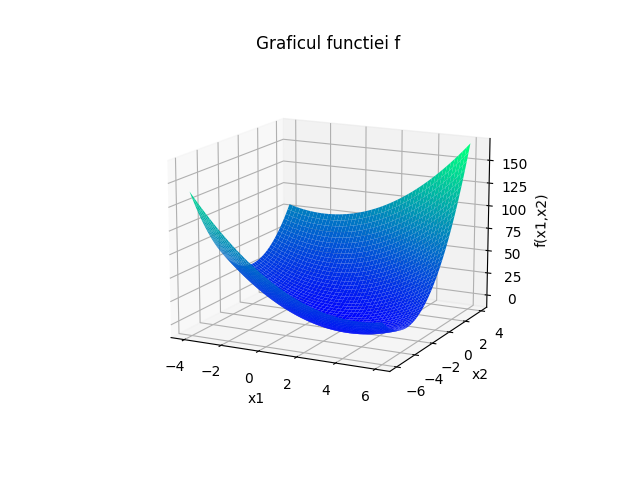

<IPython.core.display.Javascript object>


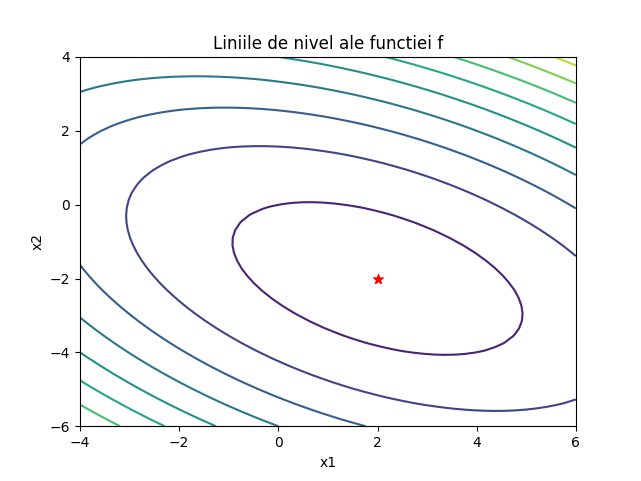

[[ 2.]
 [-2.]]


In [27]:
def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 50 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-4, 6, size) # Axa x1
    x2 = np.linspace(-6, 4, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 10) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()
        
# Definire functie f prin matricea A si vectorul b
A = np.array([[3, 2],[2, 6]]).astype(float) # Matrice pozitiv definita
b = np.array([[2],[-8]]).astype(float)

# Apelare functii grafic
grafic_f(A,b)
linii_nivel(A,b)

# Punctul de minim determinat prin rezolvarea sistemului A*x=b
x_num = metoda_Gauss_cu_pivotare_totala(A,b)
plt.scatter(x_num[0], x_num[1], s=50, c='red', marker='*')
print(x_num)
plt.show()